## IMPORTING LIBRARIES AND DATA FRAME

In [2]:
#importing packages and modules for FIFA EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#importing source data frame as 'raw_df'
raw_df=pd.read_csv('fifa_data.csv')

In [4]:
raw_df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [5]:
#creating data frame 'fifa_df' by extracting columns specifically needed for the EDA from 'raw_df' 
fifa_df=raw_df[['Name','Nationality','Club','Wage','Preferred Foot','Height']]

In [6]:
fifa_df.shape[0]

18207

In [7]:
fifa_df.head()

,Name,Nationality,Club,Wage,Preferred Foot,Height
0,L. Messi,Argentina,FC Barcelona,€565K,Left,5'7
1,Cristiano Ronaldo,Portugal,Juventus,€405K,Right,6'2
2,Neymar Jr,Brazil,Paris Saint-Germain,€290K,Right,5'9
3,De Gea,Spain,Manchester United,€260K,Right,6'4
4,K. De Bruyne,Belgium,Manchester City,€355K,Right,5'11


## <hr>

## DATA CLEANING

In [8]:
#Checking for missing values in data frame
fifa_df.isnull().sum()

Name                0
Nationality         0
Club              241
Wage                0
Preferred Foot     48
Height             48
dtype: int64

In [9]:
#checking for data types of columns
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            18207 non-null  object
 1   Nationality     18207 non-null  object
 2   Club            17966 non-null  object
 3   Wage            18207 non-null  object
 4   Preferred Foot  18159 non-null  object
 5   Height          18159 non-null  object
dtypes: object(6)
memory usage: 853.6+ KB


In [10]:
#converting and formating wages of type'object' to 'int'
def convert_wages(wage):
    wage=wage.replace('€','').replace('K','')
    return int(wage)*1000

#fifa_df['Wage']=fifa_df['Wage'].apply(convert_wages)
fifa_df.loc[:, 'Wage'] = fifa_df['Wage'].apply(convert_wages)

In [11]:
fifa_df.head()

,Name,Nationality,Club,Wage,Preferred Foot,Height
0,L. Messi,Argentina,FC Barcelona,565000,Left,5'7
1,Cristiano Ronaldo,Portugal,Juventus,405000,Right,6'2
2,Neymar Jr,Brazil,Paris Saint-Germain,290000,Right,5'9
3,De Gea,Spain,Manchester United,260000,Right,6'4
4,K. De Bruyne,Belgium,Manchester City,355000,Right,5'11


In [12]:
#converting and formatting heights of type'object' to 'float'
def convert_heights(height):
    if isinstance(height, str):
        vals=list(map(int,height.split("'")))
        inches=vals[0]*12+vals[1]
        return inches*2.54
    return height

#fifa_df['Height']=fifa_df['Height'].apply(convert_heights)
fifa_df.loc[:, 'Height'] = fifa_df['Height'].apply(convert_heights)

In [13]:
fifa_df.isnull().sum()

Name                0
Nationality         0
Club              241
Wage                0
Preferred Foot     48
Height             48
dtype: int64

In [ ]:
#filling missing values in 'Height' column with mean height
fifa_df.loc[:,'Height'] = fifa_df['Height'].fillna(fifa_df['Height'].mean())

In [15]:
#filling missing values in 'Preferred Foot' column with 'Unknown'
#fifa_df['Preferred Foot']=fifa_df['Preferred Foot'].fillna('Unknown')
fifa_df = fifa_df.fillna({'Preferred Foot': 'Unknown'})

In [16]:
#filling missing values in 'Club' column with 'Unknown'
fifa_df = fifa_df.fillna({'Club': 'Unknown'})

In [17]:
fifa_df.isnull().sum()

Name              0
Nationality       0
Club              0
Wage              0
Preferred Foot    0
Height            0
dtype: int64

In [18]:
fifa_df.to_csv('fifa_EDA_data.csv')

## <hr>

# ANALYSIS

### 1.Which country has the most number of players (score :1)

In [19]:
# Count the number of players per country
players_count = fifa_df['Nationality'].value_counts()
#print(players_count)
print(f'{players_count.idxmax()} has the most number of players ({players_count.max()} players)')

England has the most number of players (1662 players)


### 2.Plot a bar chart of 5 top countries with the most number of players. (score :1)

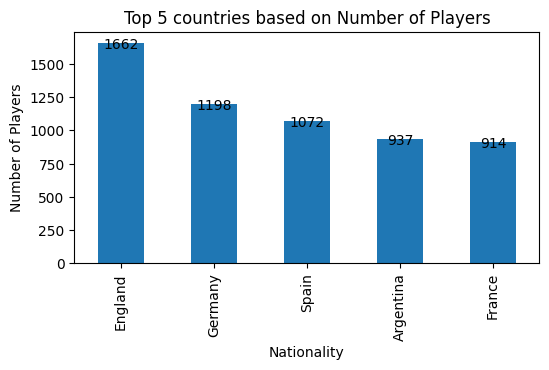

In [20]:
players_count.head(5).plot(kind='bar',figsize=(6,3))
plt.title('Top 5 countries based on Number of Players')
plt.ylabel('Number of Players')
for bar, value in enumerate(players_count.head(5)):
    plt.text(bar, value + 0.1, str(value), ha='center', va='center_baseline')
plt.show()

### 3.Which player has the highest salary? (score :1)

In [21]:
hst_paid=fifa_df.loc[fifa_df['Wage'].idxmax()]
print(f'{hst_paid['Name']} is the highest paid player with a wage of {hst_paid['Wage']} euros')

L. Messi is the highest paid player with a wage of 565000 euros


### 4.Plot a histogram to get the salary range of the players. (score :1)

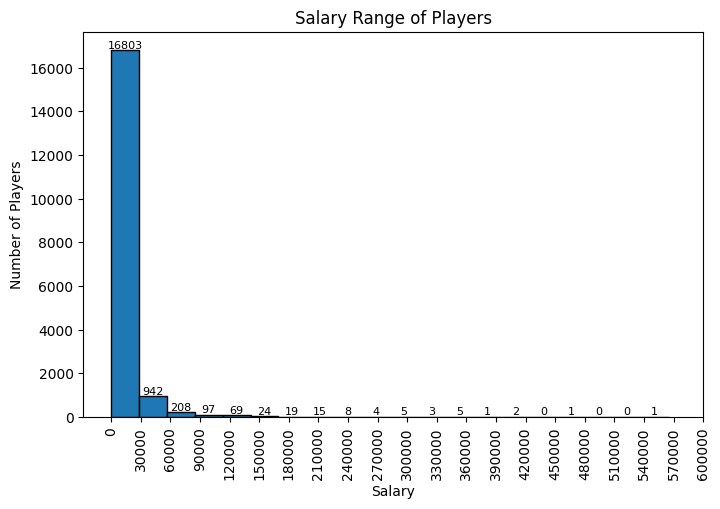

In [22]:
plt.figure(figsize=(8, 5))
figure, bins,bars=plt.hist(fifa_df['Wage'],bins=20, edgecolor='black')
plt.title('Salary Range of Players')
plt.xlabel('Salary')
plt.ylabel('Number of Players')
plt.xticks(np.arange(0,630000,30000),rotation=90)
plt.bar_label(bars, fontsize=8, color='black')
plt.show()

### 5.Who is the tallest player in the fifa? (score :1)

In [42]:
tlst_player=fifa_df.loc[fifa_df['Height']==fifa_df['Height'].max()]
#print(tlst_player)
print(f'{tlst_player.iloc[0]['Name']} and {tlst_player.iloc[1]['Name']} are the tallest players with a height of {tlst_player.iloc[0]['Height']} cms')

T. Holý and D. Hodzic are the tallest players with a height of 205.74 cms


### 6.Which club has the most number of players? (score :1)

In [54]:
rows = fifa_df['Club'].value_counts().nlargest(30)
print(rows)
#the index '0' contains Unknown since after cleaning 241 players has 'Unknown' as their club

Club
Unknown                    241
FC Barcelona                33
Burnley                     33
AS Monaco                   33
Everton                     33
TSG 1899 Hoffenheim         33
Wolverhampton Wanderers     33
Eintracht Frankfurt         33
Southampton                 33
Valencia CF                 33
Newcastle United            33
Frosinone                   33
CD Leganés                  33
Rayo Vallecano              33
Cardiff City                33
Fortuna Düsseldorf          33
RC Celta                    33
Empoli                      33
Atlético Madrid             33
Arsenal                     33
Real Madrid                 33
Tottenham Hotspur           33
Manchester United           33
Borussia Dortmund           33
Liverpool                   33
Chelsea                     33
Manchester City             33
Crystal Palace              32
SV Werder Bremen            32
Bournemouth                 32
Name: count, dtype: int64


### 7.Which foot is most preferred by the players?Draw a bar chart for preferred foot (score :1)

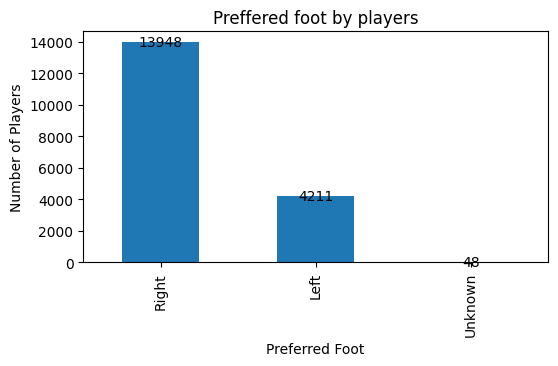

In [25]:
pref_foot = fifa_df['Preferred Foot'].value_counts()
pref_foot.plot(kind='bar',figsize=(6,3))
plt.title('Preffered foot by players')
plt.ylabel('Number of Players')
for bar, value in enumerate(pref_foot):
    plt.text(bar, value + 0.1, str(value), ha='center', va='center')
plt.show()

## <hr>

# DATA STORY / INSIGHTS

### Q1.Which country has the most number of players
### Q2.Plot a bar chart of 5 top countries with the most number of players.

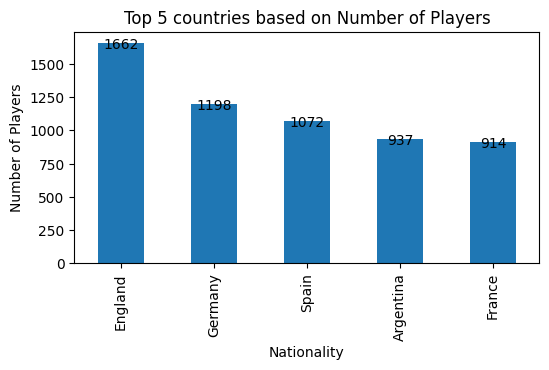

In [26]:
players_count.head(5).plot(kind='bar',figsize=(6,3))
plt.title('Top 5 countries based on Number of Players')
plt.ylabel('Number of Players')
for bar, value in enumerate(players_count.head(5)):
    plt.text(bar, value + 0.1, str(value), ha='center', va='center_baseline')
plt.show()

#### INSIGHTS: <br> The top 5 countries with the most players highlight the regions that dominate world football. These countries likely have strong national teams and are regularly featured in major international tournaments like the World Cup. Four of these countries, except Argentina, are in Europe, which may reflect various socio-economic factors such as the popularity of football in the region and the resources invested in developing players.

### Q3.Which player has the highest salary?

In [27]:
raw_df[raw_df['Overall']==raw_df['Overall'].max()]

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M


In [28]:
raw_df[raw_df['Composure']==raw_df['Composure'].max()]

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M


#### INSIGHTS: <br>L. Messi has the highest composure and overall rating among the FIFA players listed in the dataset. This, along with other metrics, might be the reason for him being the highest paid FIFA player.

### 4.Plot a histogram to get the salary range of the players.

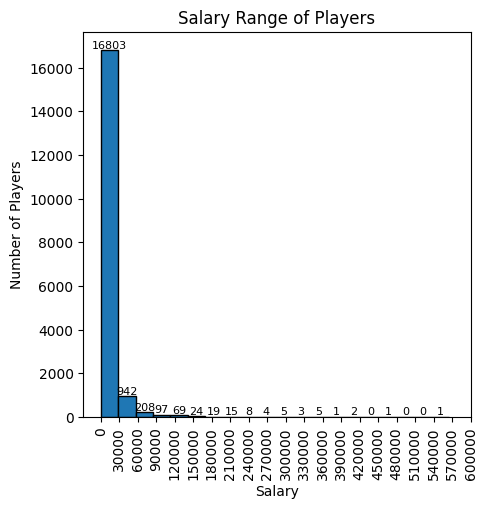

In [29]:
plt.figure(figsize=(5, 5))
figure, bins,bars=plt.hist(fifa_df['Wage'],bins=20, edgecolor='black')
plt.title('Salary Range of Players')
plt.xlabel('Salary')
plt.ylabel('Number of Players')
plt.xticks(np.arange(0,630000,30000),rotation=90)
plt.bar_label(bars, fontsize=8, color='black')
plt.show()

#### INSIGHTS:<br>Approximately 90% of the total players competing in FIFA earn between 0 and 30,000 Euros. There are a few players earning more modest wages, and a few highly paid superstars.

### Q6.Which club has the most number of players?

#### INSIGHTS:<br> The analysis showed that there are 26 clubs with the highest number of players, with a head count of 33. However, this might be inaccurate since 241 rows were filled with the value 'Unknown' in the 'Club' column during data cleaning. These players may belong to other clubs, which is why the analysis may be inaccurate. 

### Q7.Which foot is most preferred by the players?Draw a bar chart for preferred foot

#### INSIGHTS:<br> Approximately 77% of players prefer their right foot. Only a few (about 16%) are proficient with both feet(players with weak foot rating 4.0 and 5.0), and in football, being proficient with both feet can earn players higher salaries and keep them in demand.

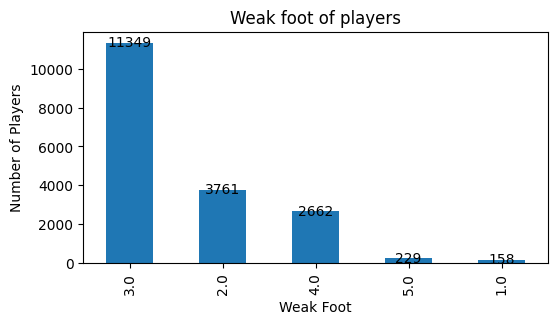

In [30]:
weak_foot = raw_df['Weak Foot'].value_counts()
weak_foot.plot(kind='bar',figsize=(6,3))
plt.title('Weak foot of players')
plt.ylabel('Number of Players')
for bar, value in enumerate(weak_foot):
    plt.text(bar, value + 0.1, str(value), ha='center', va='center')
plt.show()